In [2]:
import numpy as np
import pandas as pd
from liwc import Liwc
from matplotlib import pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
import scipy
import glob
import re
import yaml
import warnings
import nltk
warnings.filterwarnings("ignore")
tqdm.pandas()

import scipy.stats as stats

filepaths = yaml.safe_load(open("../../../config/filepaths.yaml"))

import sys
sys.path.append(filepaths['utils'])
from data import *
from liwc_utils import *
from analisys import *

In [3]:
plt.rcParams['axes.labelsize']  = 14 # fontes no tamanho usado no template
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 1.5

plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

---

In [4]:
DATASET = 'interview' # 'coraal-buckeye' | 'twitter' | 'youtube' | 'interview'

data = load_dataset(DATASET)
data.head(1)

,text,perspective_score,flair_score,textblob_score,vader_score,file,group
0,They are taxpayer-owned entities.,0.028611,0.156813,0.444444,0.0,white-f-gretchen morgenson,White Woman


In [5]:
df = data.copy()
df['text'] = df['text'].apply(lambda x: re.sub("[^\w\d'\s]+",'',x))
df['len'] = df.text.str.split(' ').str.len()
df['words'] = df.text.str.split(' ')

---

In [6]:
def count_word(df,word,group): 
    return df[df.group.str.contains(group)].words.apply(lambda x: x.count(word)).sum()

def group_total_words(df,group):
    return df[df.group.str.contains(group)].len.sum()

def contain_word_idx(df,word):
    return df.words.apply(lambda x: word in x)

def calc_word_freq(df,word,group):    
    return count_word(df,word,group) / group_total_words(df,group)

In [7]:
def sequence_ocurences_in_list(sequence,list):
    """
    count the number of times a sequence appears in a list
    """
    i = 0
    count = 0
    while i < len(list):
        if list[i:i+len(sequence)] == sequence:
            count += 1
        i += 1
    return count

def count_sequence(df,sequence,group):
    return df[df.group.str.contains(group)].words.apply(lambda x: sequence_ocurences_in_list(sequence,x)).sum()

def contain_sequence_idx(df,sequence):
    return df.words.apply(lambda x: sequence_ocurences_in_list(sequence,x)) > 0

def calc_sequence_freq(df,sequence,group):    
    return count_sequence(df,sequence,group) / group_total_words(df,group)

def calc_freq(df,x,group):
    if isinstance(x,str):
        return calc_word_freq(df,x,group)
    elif isinstance(x,list):
        return calc_sequence_freq(df,x,group)
    else:
        raise ValueError('x must be a string or a list')

def contain_term_idx(df,term):
    if isinstance(term,str):
        return contain_word_idx(df,term)
    elif isinstance(term,list):
        return contain_sequence_idx(df,term)
    else:
        raise ValueError('term must be a string or a list')

---

# Individual word analysis

## Terms more used by black
Table 5: https://www.jstor.org/stable/pdf/455845.pdf

In [8]:
word = 'bad'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0002737101409607226 16 58456
0.00031891568666533784 16 50170


In [9]:
word = 'bougie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [10]:
sequence = ['busting','out']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [11]:
word = 'freak'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [12]:
word = 'fresh'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [13]:
word = 'homie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [14]:
word = 'jones'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [15]:
word = 'mondo'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [16]:
word = 'rednecks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms in section 1.4.1 - (3) Terms for females

In [17]:
word = 'bopper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [18]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [19]:
word = 'honey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
1.9932230416583615e-05 1 50170


In [20]:
sequence = ['hot','girl']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [21]:
word = 'ma'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.7106883810045164e-05 1 58456
0.0 0 50170


In [22]:
word = 'shorty'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [23]:
word = 'wifey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms in section 1.4.1 - (4) Terms for males

In [24]:
word = 'balla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [25]:
word = 'cat'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.7106883810045164e-05 1 58456
3.986446083316723e-05 2 50170


In [26]:
word = 'cuz'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [27]:
word = 'dawg'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [28]:
word = 'dog'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.7106883810045164e-05 1 58456
0.0 0 50170


In [29]:
word = 'fool'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.7106883810045164e-05 1 58456
0.0 0 50170


In [30]:
word = 'homes'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.842753524018066e-05 4 58456
0.0 0 50170


In [31]:
word = 'kinfolk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [32]:
word = 'mark'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [33]:
word = 'money'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.00042767209525112907 25 58456
0.0007374925254135938 37 50170


In [34]:
word = 'player'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.842753524018066e-05 4 58456
0.0001195933824995017 6 50170


In [35]:
word = 'playa'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [36]:
word = 'scrub'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [37]:
word = 'slick'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms in section 1.4.1 - (8) Terms for money

In [38]:
word = 'benjis'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [39]:
word = 'benjamins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [40]:
word = 'cabbage'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [41]:
word = 'cheese'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [42]:
word = 'cream'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [43]:
word = 'duckets'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [44]:
word = 'franklins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [45]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

5.1320651430135485e-05 3 58456
7.972892166633446e-05 4 50170


In [46]:
word = 'scrilla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


#### Brathwaite (1992) list

In [47]:
word = 'bucks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [48]:
sequence = ['dead','presidents']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [49]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [50]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

5.1320651430135485e-05 3 58456
7.972892166633446e-05 4 50170


In [51]:
sequence = ['cash','money']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [52]:
word = 'dividends'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [53]:
word = 'dough'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [54]:
word = 'knot'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms for leaving (1)

In [55]:
word = 'bounce'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [56]:
sequence = ['push','off']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [57]:
word = 'murk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


##  Terms for expressing or showing envy (2)

In [58]:
sequence = ['playa','hatin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [59]:
word = 'hatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [60]:
word = 'hating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [61]:
sequence = ['hatin','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [62]:
sequence = ['balla','blockin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


##  Terms for communicating or connecting (3)

In [63]:
word = 'feel'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0009066648419323935 53 58456
0.0004983057604145904 25 50170


In [64]:
sequence = ["we're",'here']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms for making advances toward a member of the opposite sex (4)

In [65]:
sequence = ['push','up','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [66]:
sequence = ['get','wit']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [67]:
sequence = ['get','with']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
3.986446083316723e-05 2 50170


In [68]:
sequence = ['holler','at','that']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [69]:
word = 'sweatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [70]:
word = 'sweating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Terms for labeling that which is good, exciting, etc (5)

In [71]:
sequence = ['off','the','hook']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [72]:
sequence = ['off','the','chain']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [73]:
word = 'krunk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [74]:
word = 'banging'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [75]:
sequence = ['too','stupid']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


## Verbs from sction 3.2.3
https://aclanthology.org/P18-1131/

In [76]:
word = 'wanna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [77]:
word = 'gotta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [78]:
word = 'finna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [79]:
word = 'bouta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [80]:
word = 'tryna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 58456
0.0 0 50170


In [81]:
word = 'gonna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.421376762009033e-05 2 58456
1.9932230416583615e-05 1 50170


# All words analysis

In [82]:
terms = [
    # 'bad', 
    'bougie',
    ['busting','out'], 
    'freak', 
    'fresh', 
    'homie', 
    'jones', 
    'mondo',
    'rednecks',
    'bopper',
    'dime',

    'honey',
    ['hot','girl'],
    'ma',
    'shorty',
    'wifey',

    'balla',
    'cat',
    'cuz',
    'dawg',
    'dog',
    'fool',
    'homes',
    'kinfolk',
    'mark',
    'money',
    'player',
    'playa',
    'scrub',
    'slick',

    'benjis',
    'benjamins',
    'benjamin',
    'cabbage',
    'cheese',
    'cream',
    'duckets',
    'franklins',
    'franklin',
    'paper',
    'scrilla',

    'bucks',
    ['dead','presidents'],
    'dime',
    'paper',
    ['cash','money'],
    'dividends',
    'dough',
    'knot',
    'bounce',
    ['push','off'],
    'murk',

    ['playa','hatin'],
    'hatin',
    'hating',
    ['hatin','on'],
    ['balla','blockin'],

    'feel',
    ["we're",'here'],

    ['push','up','on'],
    ['get','wit'],
    ['get','with'],
    ['holler','at','that'],
    'sweatin',

    'sweating',
    ['off','the','hook'],
    ['off','the','chain'],
    'krunk',
    'banging',
    ['too','stupid'],

    'wanna',
    'gotta',
    'finna',
    'bouta',
    'tryna',
    'gonna',
]

In [83]:
black_freq = sum([calc_freq(df,x,'Black') for x in terms])
black_freq

0.001676474613384426

In [84]:
white_freq = sum([calc_freq(df,x,'White') for x in terms])
white_freq

0.0016344428941598567

In [85]:
black_freq/white_freq

1.0257162360182517

# Tocixity Analysis

In [86]:
idx = pd.Series()
for term in terms:
    if idx.empty:
        idx = contain_term_idx(df,term)
    else:
        idx = idx | contain_term_idx(df,term)

In [87]:
df_terms = pd.concat([
    df.loc[idx].copy().assign(black_term=True),
    df.loc[~idx].copy().assign(black_term=False)
])
print(idx.sum())
df_terms.head(1)


159


,text,perspective_score,flair_score,textblob_score,vader_score,file,group,len,words,black_term
14,They were worried that these kinds of losses m...,0.027066,0.999875,0.444444,0.098,white-f-gretchen morgenson,White Woman,55,"[They, were, worried, that, these, kinds, of, ...",True


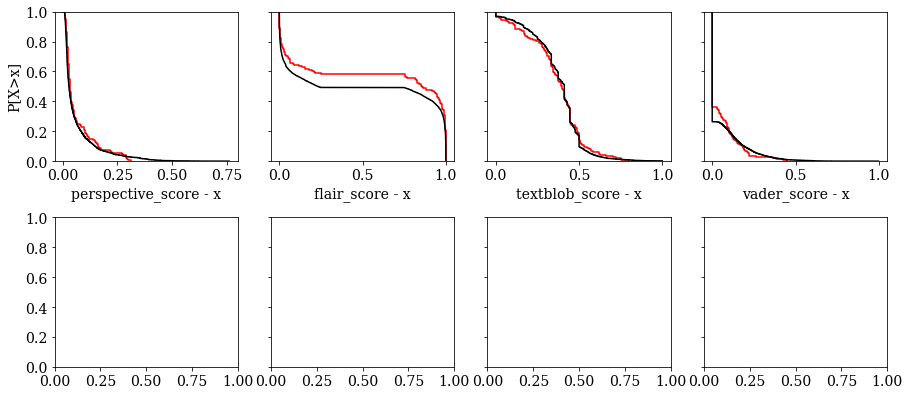

In [88]:
scores = [col for col in df_terms.columns if 'score' in col]

fig, axes = plt.subplots(2, 4, sharey=True, sharex=False, figsize=(12.8,5.6))
axes = axes.ravel()

for i,score in enumerate(scores):
    series_present = df_terms[df_terms.black_term][score]
    series_not_present = df_terms[ ~ df_terms.black_term][score]
    
    sns.ecdfplot(series_present, complementary=True, ax=axes[i], legend=False, color='red')
    g1 = sns.ecdfplot(series_not_present, complementary=True, ax=axes[i], legend=False, color='black')

    axes[i].set(ylabel='P[X>x]',xlabel='%s - x'%score)
fig.tight_layout()